In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***1-Introduction:***

RFM (Recency, Frequency, Monetary) analysis helps determine the behaviour of the customer with the organisation. The RFM values for each customer are calculated first following with the RFM Scores. Then, K-Means Clustering is implemented on the basis of the RFM Scores and in the end, we get clusters of customers. At this point, we will be able to analyze each cluster and accurately identify the characteristics of the customers. This will make it easy for the organization to customize their marketing strategies according to the customer behaviour, which will result in raised profits.

- This study examines a  methodology for consumer segmentation by combining Recency, Frequency, Monetary (RFM) information with sophisticated Machine Learning (ML) models(k-means).

**2.Problem Statment**

The problem statement for customer segmentation, identifying distinct groups within a customer base to optimize marketing, improve customer satisfaction, and enhance business performance.

In [114]:
import pandas as pd
# Afficher toutes les lignes et colonnes
df=pd.read_csv('/content/drive/MyDrive/projet data science/les projet pour client/custumor clients study/clients clustering/marketing_campaign.csv', sep=';')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [89]:
# Extract all features (column names)
all_features = df.columns.tolist()

# Display the features with the title in pink
print("\033[95mAll Features in the Dataset:\033[0m")  # \033[95m for pink, \033[0m to reset color
for feature in all_features:
    print(feature)

All Features in the Dataset:
ID;Year_Birth;Education;Marital_Status;Income;Kidhome;Teenhome;Dt_Customer;Recency;MntWines;MntFruits;MntMeatProducts;MntFishProducts;MntSweetProducts;MntGoldProds;NumDealsPurchases;NumWebPurchases;NumCatalogPurchases;NumStorePurchases;NumWebVisitsMonth;AcceptedCmp3;AcceptedCmp4;AcceptedCmp5;AcceptedCmp1;AcceptedCmp2;Complain;Z_CostContact;Z_Revenue;Response


In [91]:
import pandas as pd

# Load your dataset using the correct separator
df = pd.read_csv('/content/drive/MyDrive/projet data science/les projet pour client/custumor clients study/clients clustering/marketing_campaign.csv', sep=';')

# Compute descriptive statistics
df_description = df.describe()

# Display descriptive statistics
print(df_description)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

**3-Analyse and Handling Missing Values, duplicate:**

**- Missing value:**

In [92]:
missing_values = df.isnull().sum()  # Count of missing values in each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


We can see the only column whoe containe missing value is Income.

In [93]:
# 2. Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

in this case we only have 24 missing value in income, and it's not a big number of rows for that we will remove (and not fill it) and this process have no impact, because we have a big number of unites = 2240

In [95]:
df = df.dropna()  # Removes rows with any missing values

In [96]:
df.shape

(2216, 29)

We removed 24 unites of missing values in Income column, and we keep 2216 instead of 2240.

**- Duplicate ID:**

In [97]:
# Check for duplicate IDs
duplicate_ids = df[df['ID'].duplicated()]

# Count the number of duplicate IDs
num_duplicates = duplicate_ids.shape[0]

# Print the results
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate IDs in the dataset.")
    print("Here are the duplicate IDs:")
    print(duplicate_ids)
else:
    print("There are no duplicate IDs in the dataset.")

There are no duplicate IDs in the dataset.


**5- Create RFM features and Handling the outliers:**

**-Create RFM features:**

we have already the "Recency" parametre, but to create "frequency" and "Monetary" We will do the following:

- Frequency: the sum of "NumDealsPurchases+NumWebPurchases+NumCatalogPurchases+NumStorePurchases".

- Monetary: the sum of "MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds"

In [98]:
# Import pandas
import pandas as pd

# Load your dataset
# df = pd.read_csv('/content/drive/MyDrive/projet data science/les projet pour client/custumor clients study/clients clustering/marketing_campaign.csv', sep=';')

# Calculate Monetary: Sum of MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate Frequency: Sum of NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Keep only the required columns: Recency, Frequency, and Monetary
rfm_df = df[['ID','Recency', 'Frequency', 'Monetary']]

# Display the RFM DataFrame
print(rfm_df.head(100))


       ID  Recency  Frequency  Monetary
0    5524       58         25      1617
1    2174       38          6        27
2    4141       26         21       776
3    6182       26          8        53
4    5324       94         19       422
..    ...      ...        ...       ...
104  8908       35         20      1097
105  8373       94          5        29
106  7533       15         13       187
107  2683       56         26       910
108  3629       17          9       145

[100 rows x 4 columns]


In [99]:
rfm_df_d = df[['Recency', 'Frequency', 'Monetary']]
rfm_df_d.describe()

,Recency,Frequency,Monetary
count,2216.000000,2216.000000,2216.000000
mean,49.012635,14.880866,607.075361
std,28.948352,7.670957,602.900476
min,0.000000,0.000000,5.000000
25%,24.000000,8.000000,69.000000
50%,49.000000,15.000000,396.500000
75%,74.000000,21.000000,1048.000000
max,99.000000,44.000000,2525.000000


**-Handling the outliers:**

In [100]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data, columns):
    """
    Function to find the number of outliers using the IQR method.

    Parameters:
    - data: DataFrame containing the data.
    - columns: List of column names to check for outliers.

    Returns:
    - Series containing the number of outliers for each column.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) for the specified columns
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column
    outliers = (data[columns] < lower_bound) | (data[columns] > upper_bound)

    # Count the number of outliers in each column
    num_outliers = outliers.sum()

    return num_outliers

# Specify the columns to analyze
rfm_columns = ['Recency', 'Frequency', 'Monetary']

# Apply the function to the RFM DataFrame
outliers_per_column = find_outliers_iqr(rfm_df, rfm_columns)

# Print the number of outliers per column, sorted in descending order
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending=False))



Number of outliers per column:
Monetary     3
Frequency    2
Recency      0
dtype: int64


In [102]:
import pandas as pd
import numpy as np

def handle_outliers_iqr(data, columns):

    # Calculate the first quartile (Q1) and third quartile (Q3) for the specified columns
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    # Cap outliers
    for column in columns:
        data[column] = np.where(
            data[column] < lower_bound[column],  # If value is below lower bound
            lower_bound[column],                # Cap to lower bound
            np.where(
                data[column] > upper_bound[column],  # If value is above upper bound
                upper_bound[column],                # Cap to upper bound
                data[column]                        # Otherwise, keep the original value
            )
        )

    return data

# Specify the columns to analyze
rfm_columns = ['Recency', 'Frequency', 'Monetary']

# Apply the function to cap outliers in the RFM DataFrame
rfm_df = handle_outliers_iqr(rfm_df, rfm_columns)

# Verify the capped outliers by counting them again
outliers_per_column_capped = find_outliers_iqr(rfm_df, rfm_columns)

# Print the updated outlier counts and ensure they are zero
print("Number of outliers per column after capping:")
print(outliers_per_column_capped.sort_values(ascending=False))


Number of outliers per column after capping:
Recency      0
Frequency    0
Monetary     0
dtype: int64


<ipython-input-102-1a884a925ac2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(


In [103]:
rfm_df.shape

(2216, 4)

By using Capping tool we will Handle Outliers:

Replace values greater than the upper bound with the upper threshold.

Replace values smaller than the lower bound with the lower threshold.

**6- Data Vizualization,and the relationships between variables:**

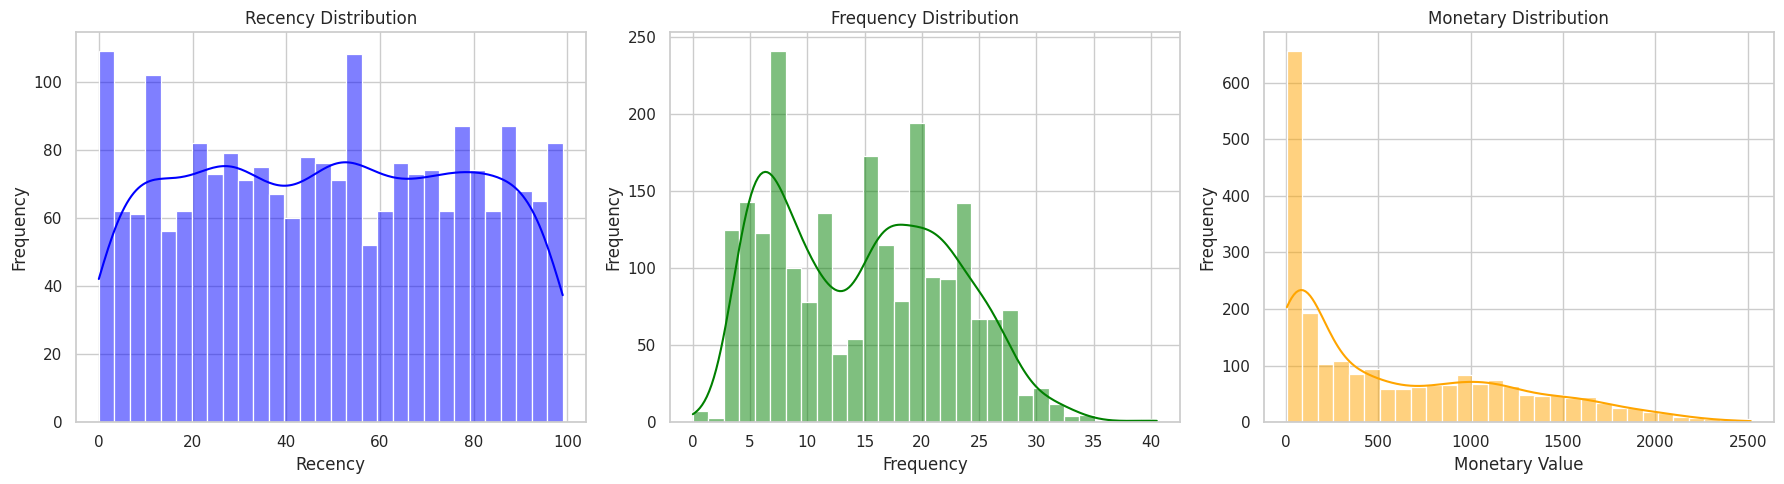

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency histogram
sns.histplot(rfm_df['Recency'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

# Frequency histogram
sns.histplot(rfm_df['Frequency'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Frequency')

# Monetary histogram
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary Value')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


The  graphs represents the distribution of customer (Recency, Frequency, Monetary), a key metrics in RFM analysis.

  - **Recency:** The histogram bars indicate the frequency of customers across different recency intervals (0 to 100).The distribution appears relatively uniform, with some fluctuations in frequency across different recency bins.There are no extreme peaks or valleys, suggesting a balanced distribution of customer recency.
  - **Frequency:**The histogram bars show the number of customers across different frequency intervals (0 to 40).The distribution appears to be right-skewed, with a higher frequency of customers making fewer purchases. There is a noticeable peak around the frequency of 5-10, indicating that a large portion of customers make a moderate number of purchases.
  - **Moneatry:** The histogram bars represent the frequency of customers within different monetary value ranges (0 to 2500).The distribution is heavily skewed to the left, with a significant number of customers having low monetary values (close to zero).There is a rapid decline in frequency as monetary value increases, indicating that fewer customers contribute higher spending.A large number of customers are low spenders, while only a small segment contributes significantly to total revenue.






**7- Assign scores to Recency, Frequency, and Monetary for your RFM (Recency, Frequency, Monetary)**

**-  Quartile-Based Scoring (Common Approach)**

1. Quartile-Based Scoring (Common Approach)

This is one of the most popular techniques, where you divide the data into quartiles (or percentiles) and assign scores accordingly.

Steps:

  Recency (R): A higher recency value means the customer has bought more recently (i.e., the customer is more valuable). So, you will assign a higher score to lower recency values (since "lower recency" means recent purchase).

  Frequency (F): A higher frequency indicates the customer buys more often. So, you will assign a higher score to higher frequency values.
  
  Monetary (M): A higher monetary value indicates that the customer spends more. So, you will assign a higher score to higher monetary values.

 Method (Using Quartiles):

  For Recency:

        1st Quartile (25%): Score = 4 (Most recent customers)
        2nd Quartile (50%): Score = 3
        3rd Quartile (75%): Score = 2
        4th Quartile (100%): Score = 1 (Least recent customers)

  For Frequency and Monetary:
  
        1st Quartile (25%): Score = 1 (Low frequency/monetary)
        2nd Quartile (50%): Score = 2
        3rd Quartile (75%): Score = 3
        4th Quartile (100%): Score = 4 (High frequency/monetary)

assigns RFM (Recency, Frequency, Monetary) scores to my customers based on quartiles using pd.qcut.

In [105]:
import pandas as pd

# Assuming 'rfm_df' has columns 'Recency', 'Frequency', 'Monetary'

# Function to assign score based on quartiles
def score_rfm(df):
    # Recency: Lower recency is better, so we reverse the scores
    df['R_Score'] = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])

    # Frequency: Higher frequency is better
    df['F_Score'] = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])

    # Monetary: Higher monetary is better
    df['M_Score'] = pd.qcut(df['Monetary'], 4, labels=[1, 2, 3, 4])

    return df

# Apply scoring function
rfm_df = score_rfm(rfm_df)

# Display only the original features and their corresponding scores
rfm_df_scores = rfm_df[['ID','Recency', 'R_Score', 'Frequency', 'F_Score', 'Monetary', 'M_Score']]

# Display the dataframe with scores
print(rfm_df_scores.head(20))


      ID  Recency R_Score  Frequency F_Score  Monetary M_Score
0   5524     58.0       2       25.0       4    1617.0       4
1   2174     38.0       3        6.0       1      27.0       1
2   4141     26.0       3       21.0       3     776.0       3
3   6182     26.0       3        8.0       1      53.0       1
4   5324     94.0       1       19.0       3     422.0       3
5   7446     16.0       4       22.0       4     716.0       3
6    965     34.0       3       21.0       3     590.0       3
7   6177     32.0       3       10.0       2     169.0       2
8   4855     19.0       4        6.0       1      46.0       1
9   5899     68.0       2        2.0       1      49.0       1
11   387     59.0       2        6.0       1      61.0       1
12  2125     82.0       1       16.0       3    1102.0       4
13  8180     53.0       2       15.0       2     310.0       2
14  2569     38.0       3        5.0       1      46.0       1
15  2114     23.0       4       26.0       4    1315.0 

<ipython-input-105-1c56fae3adef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R_Score'] = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])
<ipython-input-105-1c56fae3adef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_Score'] = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])
<ipython-input-105-1c56fae3adef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

**8- Apply k-mean clusterin and label each cluster:**

**Determine the optimal number of clusters and train the model.**

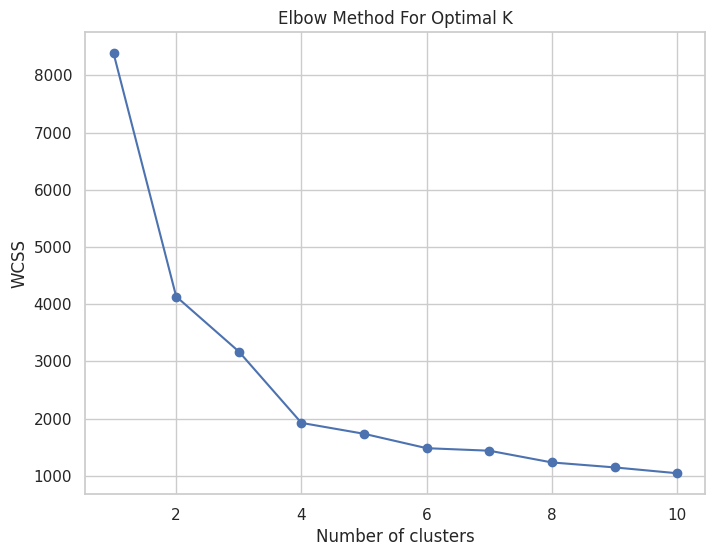

     ID R_Score F_Score M_Score  Cluster
0  5524       2       4       4        1
1  2174       3       1       1        0
2  4141       3       3       3        3
3  6182       3       1       1        0
4  5324       1       3       3        4


<ipython-input-106-3714977ea4dc>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = kmeans.fit_predict(rfm_features)


In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming rfm_df has columns 'R_Score', 'F_Score', 'M_Score'
# Using R_Score, F_Score, and M_Score for clustering without scaling

# Select the features for clustering
rfm_features = rfm_df[['R_Score', 'F_Score', 'M_Score']]

# Elbow Method to find the optimal number of clusters
wcss = []  # List to store WCSS (Within-Cluster Sum of Squares)
for i in range(1, 11):  # Try different numbers of clusters (1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_features)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the elbow curve to visually inspect the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, choose the number of clusters (e.g., n_clusters = 5)
optimal_clusters = 5  # Adjust this based on the elbow plot result

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_features)

# Display the first few rows of the data with clusters
print(rfm_df[['ID', 'R_Score', 'F_Score', 'M_Score', 'Cluster']].head())





Clusters: [1 0 3 4 2]


<ipython-input-107-0945ae903d7a>:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], label=f'Cluster {cluster}', c=plt.cm.viridis(cluster / rfm_df['Cluster'].max()))


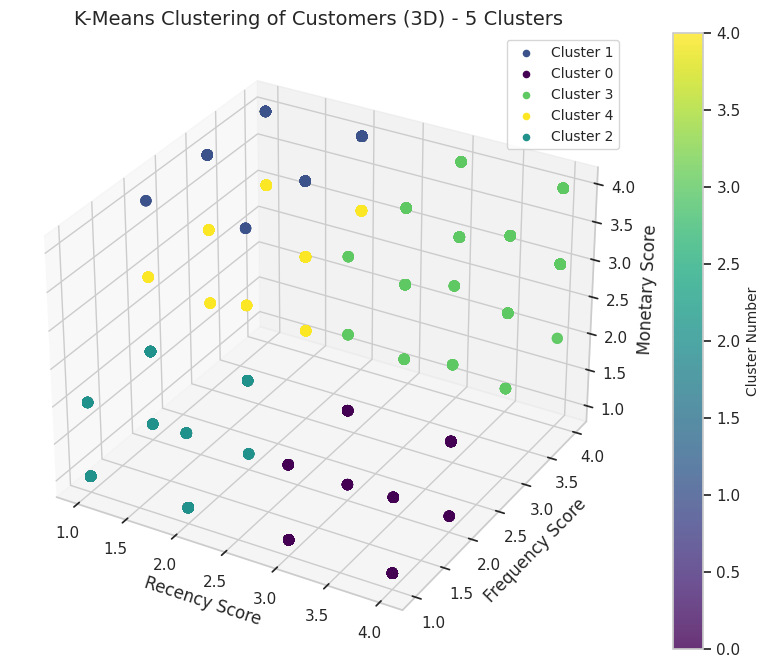

In [107]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Ensure the clusters are available in rfm_df
clusters = rfm_df['Cluster'].unique()  # Get the unique clusters
print(f"Clusters: {clusters}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(
    rfm_df['R_Score'],  # Using original R_Score
    rfm_df['F_Score'],  # Using original F_Score
    rfm_df['M_Score'],  # Using original M_Score
    c=rfm_df['Cluster'],  # Use cluster labels for coloring
    cmap='viridis',       # Colormap for cluster visualization
    s=50,                 # Adjust marker size
    alpha=0.8             # Transparency for better visibility
)

# Add axis labels
ax.set_xlabel('Recency Score', fontsize=12)
ax.set_ylabel('Frequency Score', fontsize=12)
ax.set_zlabel('Monetary Score', fontsize=12)
ax.set_title(f'K-Means Clustering of Customers (3D) - {optimal_clusters} Clusters', fontsize=14)

# Add a color bar to indicate cluster labels
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
cbar.set_label('Cluster Number', fontsize=10)

# Manually add legend for clusters
for cluster in clusters:
    ax.scatter([], [], [], label=f'Cluster {cluster}', c=plt.cm.viridis(cluster / rfm_df['Cluster'].max()))

ax.legend(loc='upper right', fontsize=10)

# Show the plot
plt.show()



**Analyze Clusters and Label Them**


Cluster 1 Statistics:
        R_Score  F_Score  M_Score
count       282      282      282
unique        2        3        1
top           2        4        4
freq        145      140      282


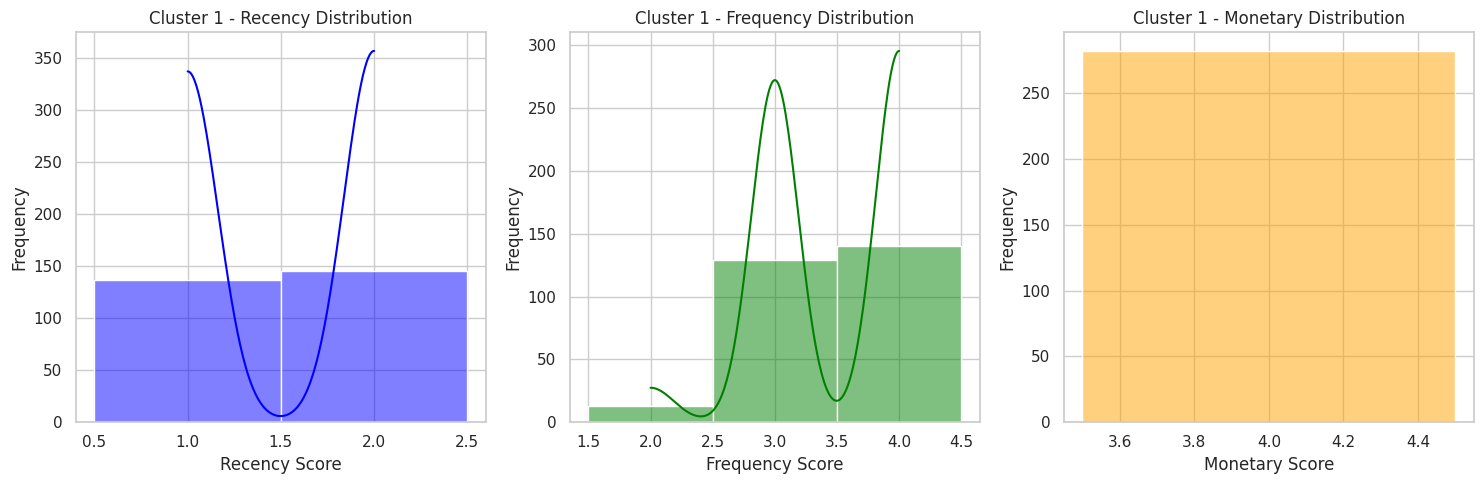


Cluster 0 Statistics:
        R_Score  F_Score  M_Score
count       535      535      535
unique        2        2        2
top           4        1        1
freq        269      329      297


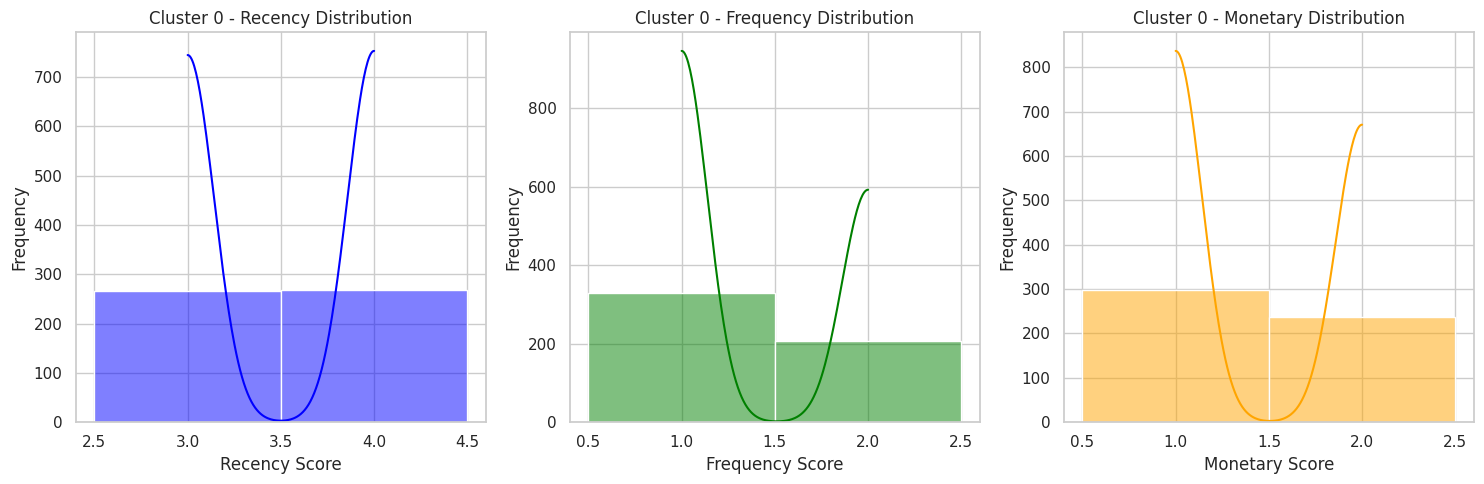


Cluster 3 Statistics:
        R_Score  F_Score  M_Score
count       578      578      578
unique        2        3        3
top           4        3        3
freq        293      287      272


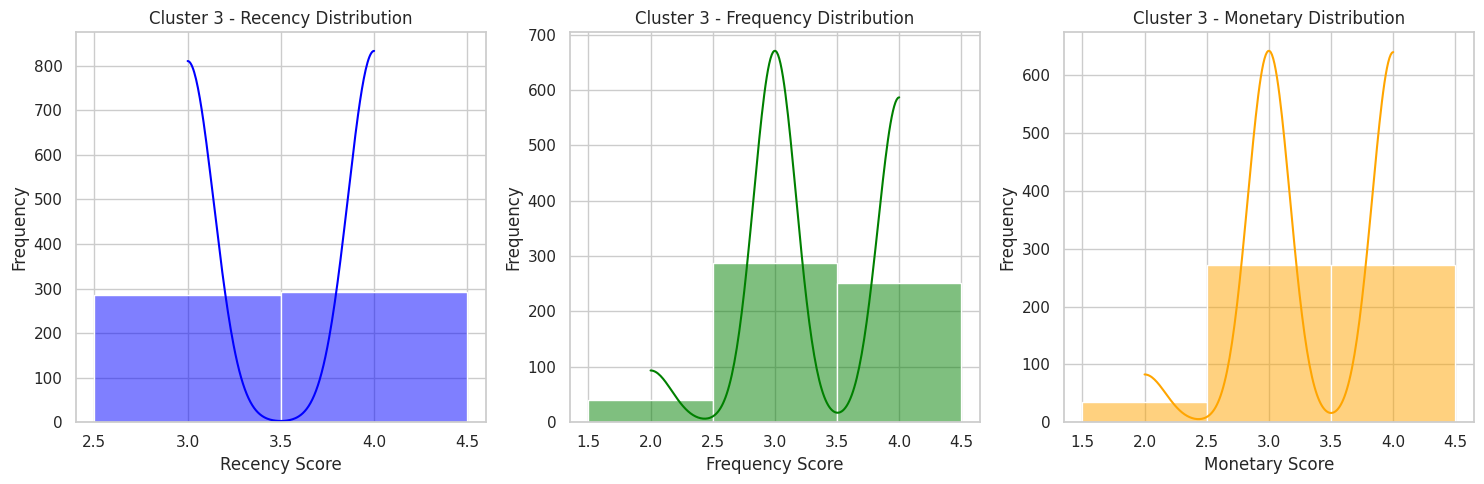


Cluster 4 Statistics:
        R_Score  F_Score  M_Score
count       318      318      318
unique        2        3        2
top           2        3        3
freq        186      167      283


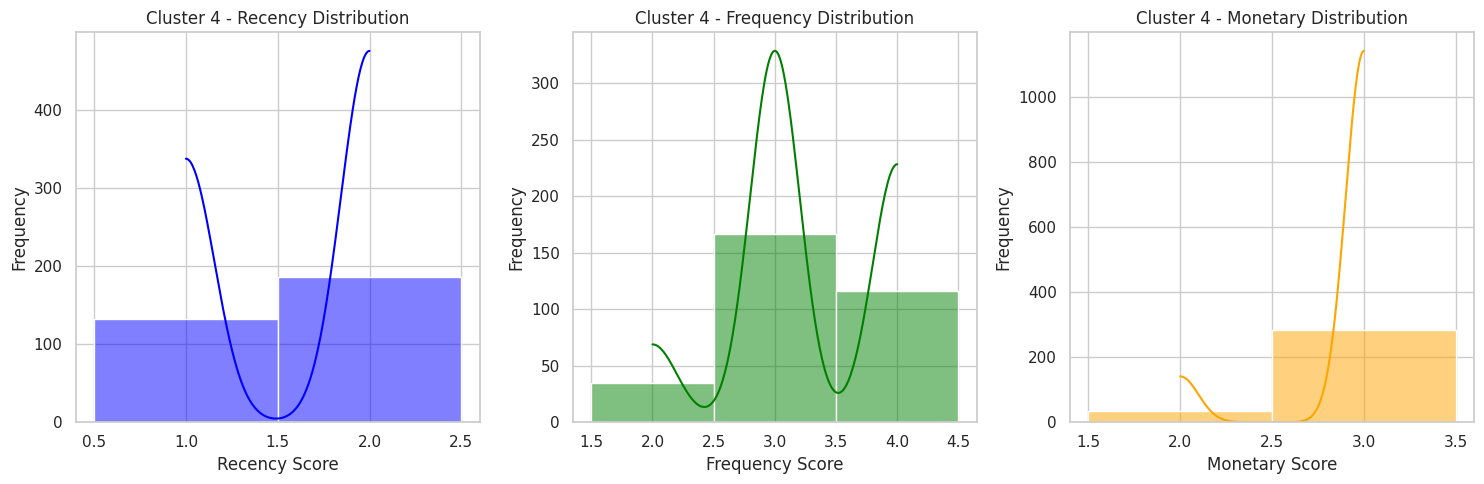


Cluster 2 Statistics:
        R_Score  F_Score  M_Score
count       503      503      503
unique        2        2        2
top           1        1        1
freq        272      313      265


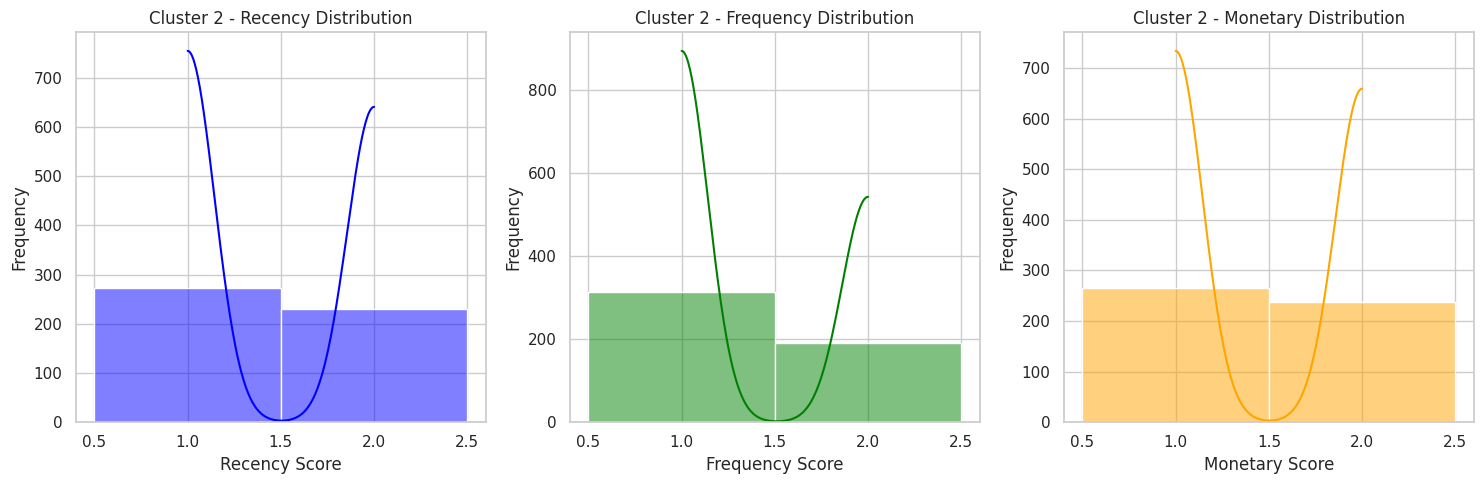

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique cluster labels
clusters = rfm_df['Cluster'].unique()

# Loop through each cluster and analyze
for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster]

    # Display descriptive statistics for the cluster
    print(f"\nCluster {cluster} Statistics:")
    print(cluster_data[['R_Score', 'F_Score', 'M_Score']].describe())  # Using original RFM values

    # Plot the distribution of Recency, Frequency, and Monetary for the cluster
    plt.figure(figsize=(15, 5))

    # Distribution for Recency
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data['R_Score'], kde=True, bins=15, color='blue')  # Original R_Score
    plt.title(f'Cluster {cluster} - Recency Distribution')
    plt.xlabel('Recency Score')
    plt.ylabel('Frequency')

    # Distribution for Frequency
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data['F_Score'], kde=True, bins=15, color='green')  # Original F_Score
    plt.title(f'Cluster {cluster} - Frequency Distribution')
    plt.xlabel('Frequency Score')
    plt.ylabel('Frequency')

    # Distribution for Monetary
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data['M_Score'], kde=True, bins=15, color='orange')  # Original M_Score
    plt.title(f'Cluster {cluster} - Monetary Distribution')
    plt.xlabel('Monetary Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



Count refers to the number of customers.

Unique refers to how many different (distinct) values each of the RFM scores

Top refers to the most frequent value in each score category.


Frequency tells us how many times the Top value occurs.

**Frequency of each parameter in rfm for each cluster:**

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique cluster labels
clusters = rfm_df['Cluster'].unique()

# Loop through each cluster and analyze
for cluster in clusters:
    # Filter data for the current cluster
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster]

    print(f"\nCluster {cluster} - Frequency of Scores")

    # Frequency of each score in Recency
    recency_counts = cluster_data['R_Score'].value_counts().sort_index()  # Original R_Score
    print(f"Recency Score Frequency:\n{recency_counts}")

    # Frequency of each score in Frequency
    frequency_counts = cluster_data['F_Score'].value_counts().sort_index()  # Original F_Score
    print(f"Frequency Score Frequency:\n{frequency_counts}")

    # Frequency of each score in Monetary
    monetary_counts = cluster_data['M_Score'].value_counts().sort_index()  # Original M_Score
    print(f"Monetary Score Frequency:\n{monetary_counts}")





Cluster 1 - Frequency of Scores
Recency Score Frequency:
R_Score
4      0
3      0
2    145
1    137
Name: count, dtype: int64
Frequency Score Frequency:
F_Score
1      0
2     13
3    129
4    140
Name: count, dtype: int64
Monetary Score Frequency:
M_Score
1      0
2      0
3      0
4    282
Name: count, dtype: int64

Cluster 0 - Frequency of Scores
Recency Score Frequency:
R_Score
4    269
3    266
2      0
1      0
Name: count, dtype: int64
Frequency Score Frequency:
F_Score
1    329
2    206
3      0
4      0
Name: count, dtype: int64
Monetary Score Frequency:
M_Score
1    297
2    238
3      0
4      0
Name: count, dtype: int64

Cluster 3 - Frequency of Scores
Recency Score Frequency:
R_Score
4    293
3    285
2      0
1      0
Name: count, dtype: int64
Frequency Score Frequency:
F_Score
1      0
2     40
3    287
4    251
Name: count, dtype: int64
Monetary Score Frequency:
M_Score
1      0
2     35
3    272
4    271
Name: count, dtype: int64

Cluster 4 - Frequency of Scores
Rece

In [110]:
import pandas as pd
import numpy as np

# Assuming 'rfm_df' is your dataframe containing the cluster labels and RFM scores

# Step 1: Ensure R_Score, F_Score, and M_Score are numeric
rfm_df['R_Score'] = pd.to_numeric(rfm_df['R_Score'], errors='coerce')
rfm_df['F_Score'] = pd.to_numeric(rfm_df['F_Score'], errors='coerce')
rfm_df['M_Score'] = pd.to_numeric(rfm_df['M_Score'], errors='coerce')

# Step 2: Calculate the mean RFM scores for each cluster
cluster_summary = rfm_df.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score']].mean()
print(cluster_summary)

# Step 3: Label each cluster based on its RFM scores
def label_cluster(row):
    # Champions
    if row['R_Score'] > 3 and row['F_Score'] > 3 and row['M_Score'] > 3:
        return 'Champions (High Recency, Frequency, and Monetary)'
    # Big Spenders
    elif row['R_Score'] > 3 and row['F_Score'] <= 3 and row['M_Score'] > 3:
        return 'Big Spenders (High Recency and Monetary, Low Frequency)'
    # Loyal Customers
    elif row['R_Score'] <= 3 and row['F_Score'] > 3 and row['M_Score'] <= 3:
        return 'Loyal Customers (High Frequency, Low Recency and Monetary)'
    # Lost Customers
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2 and row['M_Score'] <= 2:
        return 'Lost Customers (Low Recency, Frequency, and Monetary)'
    # At Risk
    elif row['R_Score'] <= 2 and row['F_Score'] > 2 and row['M_Score'] <= 3:
        return 'At Risk (Low Recency, High Frequency, Low Monetary)'
    # Add new categories for varied behaviors
    elif row['R_Score'] > 3 and row['F_Score'] > 2 and row['M_Score'] <= 3:
        return 'Potential Loyalists (High Recency, Medium Frequency, Low Monetary)'
    elif row['R_Score'] <= 2 and row['F_Score'] > 3 and row['M_Score'] > 3:
        return 'Spending Risks (Low Recency, High Frequency and Monetary)'
    elif row['R_Score'] > 3 and row['F_Score'] <= 2 and row['M_Score'] <= 2:
        return 'New Customers (High Recency, Low Frequency and Monetary)'
    # Default to Varied Behavior
    else:
        return 'Other (Varied Behavior)'


# Apply the label function to each cluster
cluster_summary['Segment_Label'] = cluster_summary.apply(label_cluster, axis=1)

# Step 4: Display the cluster summary with labels
print(cluster_summary[['R_Score', 'F_Score', 'M_Score', 'Segment_Label']])

# Optional: Assign the segment label to each customer in the original dataframe
rfm_df['Cluster_Label'] = rfm_df['Cluster'].map(cluster_summary['Segment_Label'])

# Step 5: Display the dataframe with cluster labels
print(rfm_df[['ID', 'R_Score', 'F_Score', 'M_Score', 'Cluster', 'Cluster_Label']].head())


          R_Score   F_Score   M_Score
Cluster                              
0        3.502804  1.385047  1.444860
1        1.514184  3.450355  4.000000
2        1.459245  1.377734  1.473161
3        3.506920  3.365052  3.408304
4        1.584906  3.254717  2.889937
          R_Score   F_Score   M_Score  \
Cluster                                 
0        3.502804  1.385047  1.444860   
1        1.514184  3.450355  4.000000   
2        1.459245  1.377734  1.473161   
3        3.506920  3.365052  3.408304   
4        1.584906  3.254717  2.889937   

                                             Segment_Label  
Cluster                                                     
0        New Customers (High Recency, Low Frequency and...  
1        Spending Risks (Low Recency, High Frequency an...  
2        Lost Customers (Low Recency, Frequency, and Mo...  
3        Champions (High Recency, Frequency, and Monetary)  
4        Loyal Customers (High Frequency, Low Recency a...  
     ID  R_Score  F

<ipython-input-110-27e0cde52e54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['R_Score'] = pd.to_numeric(rfm_df['R_Score'], errors='coerce')
<ipython-input-110-27e0cde52e54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['F_Score'] = pd.to_numeric(rfm_df['F_Score'], errors='coerce')
<ipython-input-110-27e0cde52e54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [111]:
# Count the number of clients in each cluster label
cluster_label_counts = rfm_df['Cluster_Label'].value_counts()

# Calculate the percentage of each cluster label
cluster_label_percentage = (cluster_label_counts / len(rfm_df)) * 100

# Combine counts and percentages into a DataFrame for display
cluster_label_summary = pd.DataFrame({
    'Number of Clients': cluster_label_counts,
    'Percentage of Clients': cluster_label_percentage
})

# Display the summary
print(cluster_label_summary)


                                                    Number of Clients  \
Cluster_Label                                                           
Champions (High Recency, Frequency, and Monetary)                 578   
New Customers (High Recency, Low Frequency and ...                535   
Lost Customers (Low Recency, Frequency, and Mon...                503   
Loyal Customers (High Frequency, Low Recency an...                318   
Spending Risks (Low Recency, High Frequency and...                282   

                                                    Percentage of Clients  
Cluster_Label                                                              
Champions (High Recency, Frequency, and Monetary)               26.083032  
New Customers (High Recency, Low Frequency and ...              24.142599  
Lost Customers (Low Recency, Frequency, and Mon...              22.698556  
Loyal Customers (High Frequency, Low Recency an...              14.350181  
Spending Risks (Low Recency, Hig

In [112]:
import plotly.express as px

# Convert the cluster label summary into a DataFrame (if not already done)
cluster_label_summary = pd.DataFrame({
    'Cluster_Label': cluster_label_counts.index,
    'Number of Clients': cluster_label_counts.values,
    'Percentage of Clients': cluster_label_percentage.values
})

# Create a Tree Map
fig = px.treemap(cluster_label_summary,
                 path=['Cluster_Label'],
                 values='Number of Clients',
                 hover_data=['Percentage of Clients'],
                 color='Percentage of Clients',
                 color_continuous_scale='Viridis',
                 title='Distribution of Clients Across Cluster Labels')

# Show the plot
fig.show()


**Conclusion:**

We divided the customers into five distinct clusters based on their RFM (Recency, Frequency, Monetary) scores. Each cluster represents a unique group of customers with different behaviors and characteristics.

Spending Risks

  Characteristics:
        Low Recency: These customers have not engaged with your business recently.
        High Frequency and Medium/High Monetary: They were previously active and spent moderately or significantly.

New Customers

  Characteristics:
        High Recency: These customers made recent purchases.
        Low Frequency and Monetary: They are new or occasional buyers with low spending levels.

Lost Customers

  Characteristics:
        Low Recency, Frequency, and Monetary: These customers have disengaged completely.

Potential Loyalists

  Characteristics:
        High Recency: They have recently made purchases.
        Medium Frequency and Monetary: They engage somewhat regularly and spend moderately.

Champions

  Characteristics:
        High Recency, Frequency, and Monetary: These customers are the most engaged, frequent, and high-spending.